In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [45]:
sales_of_company_x['Count'] = sales_of_company_x['Count'][~(sales_of_company_x['Count'].isnull())]
robberies_in_boston['Count'] = robberies_in_boston['Count'][~(robberies_in_boston['Count'].isnull())]
airlines_passengers['Count'] = airlines_passengers['Count'][~(airlines_passengers['Count'].isnull())]
mean_monthly_temp['Deg'] = mean_monthly_temp['Deg'][~(mean_monthly_temp['Deg'].isnull())]
dowjones_closing['Close'] = dowjones_closing['Close'][~(dowjones_closing['Close'].isnull())]
female_births['Count'] = female_births['Count'][~(female_births['Count'].isnull())]

all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [30]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [71]:
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

norm_serias = dict()
diff_all_series = dict()
for k, v in all_series.items():
    norm_serias[k] = boxcox(v, 0)

for k, v in norm_serias.items():
    diff_all_series[k] = np.diff(norm_serias[k], 12)
    print(k)
    test_stationarity(diff_all_series[k])
    print("------")

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                -7.633549e+00
p-value                        1.979614e-11
#Lags Used                     1.100000e+01
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64
------
Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                -1.126618e+01
p-value                        1.577441e-20
#Lags Used                     1.300000e+01
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64
------
International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                -1.606060e+01
p-value                        5.644461e-29
#Lags Used                     1.300000

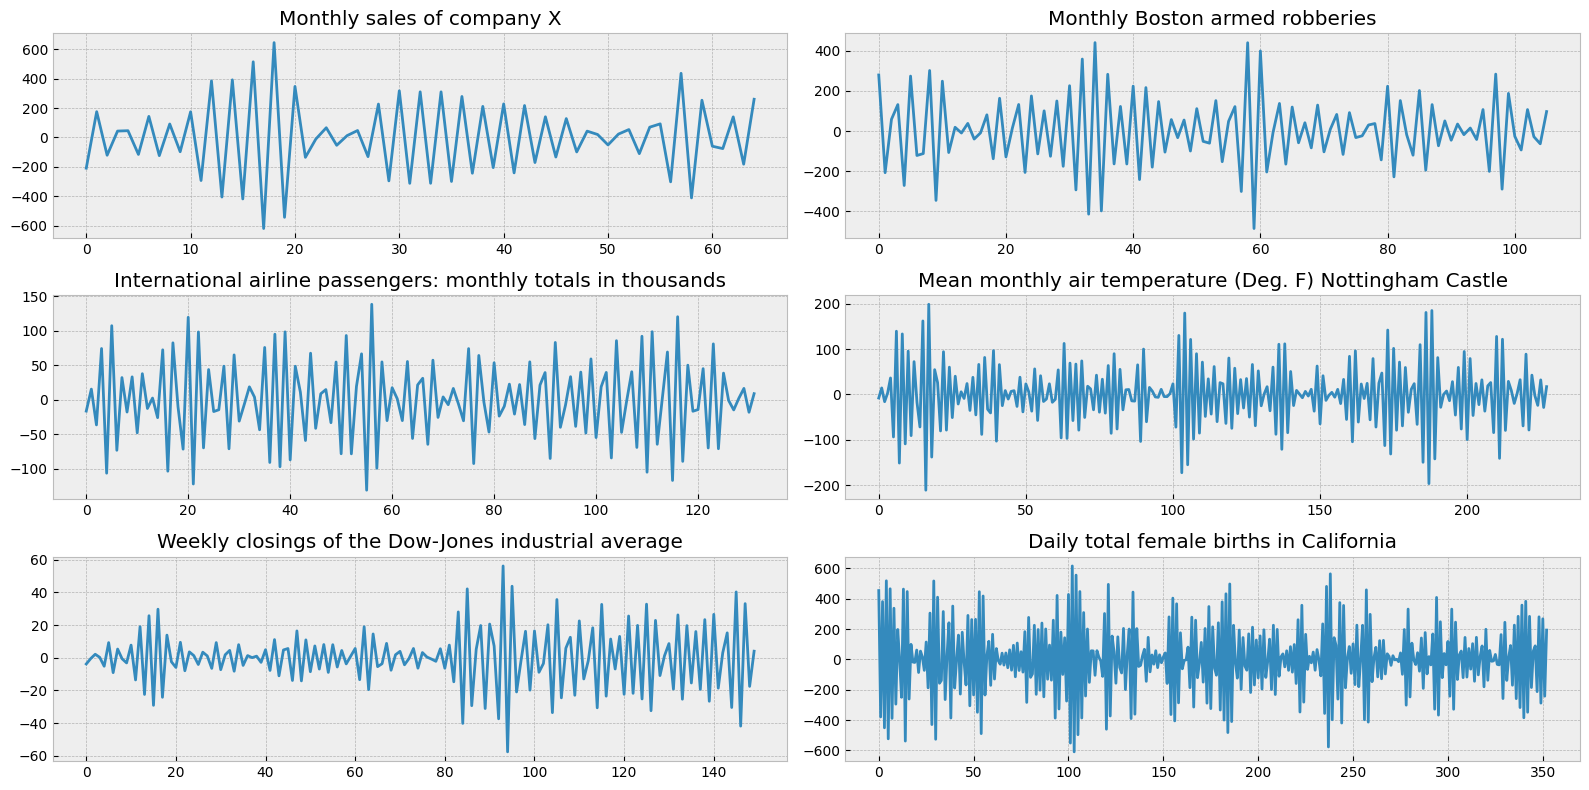

In [72]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(diff_all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        plt.plot(diff_all_series[key], label=key)
        ts_ax.set_title(key)
        
    plt.tight_layout()
    plt.show()